In [12]:
#import tensorflow 
import tensorflow as tf
# You can avoid the long names by using
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [13]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'font.family': 'DejaVu Sans',
          'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
# sns.set_style("white")

In [14]:
# Read the `cosine.csv` file
df = pd.read_csv('cosine.csv')

Text(0.5, 0.98, 'Analytical solution')

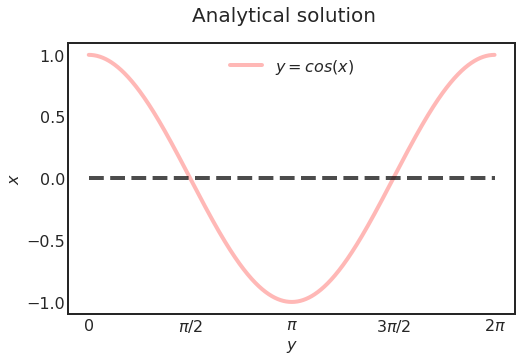

In [15]:
x,y = df.x.values.reshape(-1,1),df.y.values.reshape(-1,1)

fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x,y,label='$y = cos(x)$',color ='#FF9A98',lw=4,alpha=0.7)
ax.plot([0,6.28],[0,0],'--',color ='k',lw=4,alpha=0.7)
ax.set_xlabel('$y$',fontsize=16)
ax.set_ylabel('$x$',fontsize=16)
ax.legend(loc='upper center')
ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$', r'$\pi$'
          , r'$3\pi/2$', r'$2\pi$']
ax.set_xticklabels(labels)

fig.suptitle('Analytical solution',fontsize=20);

In [16]:
x.shape

(1000, 1)

## Backpropagation using tensorflow

In [17]:
# Define your neural network as per the instructions

mlp = tf.keras.Sequential()
mlp.add(tf.keras.Input(shape=(1,)))
mlp.add(tf.keras.layers.Dense(32,),activation = "elu")
mlp.add(tf.keras.layers.Dense(1,))
mlp.summary()

In [0]:
# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Instantiate an optimizer
optimizer = tf.keras.optimizers.Adam()

# Initialize a list to store the losses
losses = []

# Define number of epochs
num_epochs = 4000

# Run a loop for the number of epochs
for i in range(num_epochs):

    # Open a GradientTape
    with tf.GradientTape() as tape:

        # Forward pass.
        output = mlp(x)

        # Loss value for this batch.
        loss = 

    # Get gradients of weights wrt the loss.
    gradients = ___

    # Update the weights of our linear layer.
    # Use optimizer.apply_gradients() function
    optimizer.___
        
    # Append the loss to the losses list
    losses.append(loss)
    
    # For every 100th epoch print the loss
    if i%100==0:
        print(f'Loss is {loss} at epoch {i}')


In [0]:
# Use the helper code below to visualize your results

y_pred = mlp.predict(x)
fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(x,y,label='$y=cos(x)$',color ='#FF9A98',lw=6,alpha=0.7)
axes[0].plot(x,y_pred,'-',label='NN approximation',color ='#2252f0',lw=3,alpha=0.5,markersize=10)
axes[0].plot([0,6.28],[0,0],'--',color ='k',lw=2,alpha=0.7)
axes[0].set_xlabel('$x$',fontsize=16)
axes[0].set_ylabel('$y$',fontsize=16)
axes[0].legend(loc='upper center')
axes[0].set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$', r'$\pi$'
          , r'$3\pi/2$', r'$2\pi$']
axes[0].set_xticklabels(labels)

axes[1].plot(losses,lw=2,color='k')
axes[1].set_title('Trace plot of Loss',fontsize=24);
axes[1].set_xlabel('$epochs$',fontsize=18)
axes[1].set_ylabel('Training Loss',fontsize=18)


axes[0].set_title('NN approximation',fontsize=24);
plt.tight_layout()